<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q2_gradNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

# **MNIST DATA**

In [ ]:
# Trining dataset
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)
train_images1 = np.reshape(train_images, (-1,784))
test_images1 = np.reshape(test_images, (-1, 784))
train_object = tf.data.Dataset.from_tensor_slices((train_images1,train_labels))# Tensor object
train_object = train_object.shuffle(1024).batch(64)
train_object

<BatchDataset shapes: ((None, 784), (None,)), types: (tf.float64, tf.uint8)>

In [ ]:
images = keras.Input(shape=(784,))
hidden1 = layers.Dense(128, activation="relu")(images)
hidden2 = layers.Dense(128, activation="relu")(hidden1)
hidden3 = layers.Dense(128, activation="relu")(hidden2)
classify = layers.Dense(10)(hidden3)
model = keras.Model(inputs=images, outputs=classify)
    # optimizer
opt=tf.keras.optimizers.Adam(learning_rate=1)

loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#history= model.fit(train_images, train_labels, epochs=1,  validation_split=0.1,  batch_size=64)
# initialise list of gradient norm
g_norm = []
loss1=[]

In [ ]:
def func_to_calculate_grad_norm(model, train_object):
    for LayerNum, (images,labels) in enumerate(train_object):
# watch the gradient tape using keras 
#Page: https://www.tensorflow.org/api_docs/python/tf/GradientTape
        with tf.GradientTape() as tt:
            logits = model(images, training=True)  
            los = loss(labels, logits)
            loss1.append(los)
        dL_dw = tt.gradient(los, model.trainable_weights)
        ss = [K.sum(K.square(grad)) for grad in dL_dw]
        norm = K.sqrt(sum(ss))
        g_norm.append(norm)


In [ ]:
func_to_calculate_grad_norm(model, train_object)

Text(0, 0.5, 'Loss')

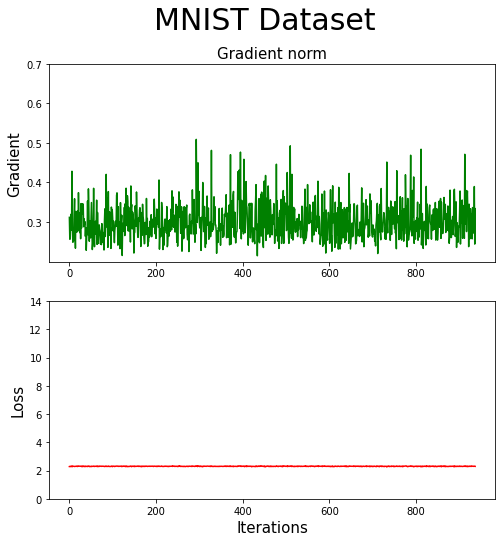

In [ ]:
fig =plt.figure(figsize=(8,8))
fig.suptitle('MNIST Dataset',fontsize=30)
#ax1
ax1 = fig.add_subplot(2,1,1)
ax1.plot(g_norm,'g')
ax1.set_yticks(np.arange(0.3, .8, step=.1))
ax1.set_ylabel('Gradient',fontsize=15)
ax1.set_title('Gradient norm',Fontsize=15 )

# ax2
ax2 = fig.add_subplot(2,1,2)
ax2.plot(loss1,'r')
ax2.set_yticks(np.arange(0, 15, step=2))
ax2.set_xlabel('Iterations',fontsize=15)
ax2.set_ylabel('Loss',fontsize=15)